In [1]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score,f1_score
from sklearn.feature_selection import SelectFromModel,SelectFpr,SelectFwe,SelectFdr
from sklearn.feature_selection import SequentialFeatureSelector,f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC




import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
from xgboost import XGBClassifier
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('./datasets/model_data/train.csv',index_col=0)
test = pd.read_csv('./datasets/model_data/test.csv',index_col=0)
train.columns

Index(['회사명', '회계년도', '상장일', '통계청 한국표준산업분류 10차(대분류)', '거래소코드', '대주주지분변화분',
       '외국인지분분변화', '자산', '당기순이익(손실)', '비유동자산증가율', '유동자산증가율', '자기자본증가율',
       '매출액증가율', '정상영업이익증가율', '순이익증가율', '총포괄이익증가율', '매출액순이익률', '자기자본순이익률',
       '광고선전비대매출액비율', '비유동비율', '당좌비율', '현금비율', '부채비율', '이자보상배율(이자비용)',
       '유보액대납입자본배율', '투자집중도', '1인년간평균급여(직원)', '토빈Q', 'WW지수', 'RDS',
       '산업평균_총자산증가율차분', '보통주식비율', '외국인_주식분포비율', '업력', '도입기', '성숙기', '성장기',
       '쇠퇴기', 'target'],
      dtype='object')

In [4]:
map = {'보통주식비율':'대주주지분율'}
train.rename(columns = map,inplace=True)
test.rename(columns = map,inplace=True)



col_int = ['대주주지분변화분', '외국인지분분변화', '자산', '비유동자산증가율', '유동자산증가율', '자기자본증가율',
       '정상영업이익증가율','매출액순이익률', '자기자본순이익률',
       '매출액증가율', '광고선전비대매출액비율', '비유동비율', '당좌비율', '현금비율', '부채비율',
       '이자보상배율(이자비용)', '유보액대납입자본배율', '투자집중도', '1인년간평균급여(직원)', '토빈Q', 'WW지수',
       'RDS', '업력', '산업평균_총자산증가율차분', '대주주지분율', '외국인_주식분포비율']
       
x_train = train[col_int]
y_train = train[['target']]

x_test = test[col_int]
y_test = test[['target']]

## SelectFromModel을 통한 피쳐 선정

---

In [48]:
#  선정된 피쳐를 저장하기 위한 데이터프레임 생성 
df_select = pd.DataFrame()

# 생성된 데이터프레임의 인덱스 지정
df_select.index = x_train.columns

In [49]:

#  LogisticRegression
selector = SelectFromModel(estimator=LogisticRegression(penalty='l1',solver='liblinear',C=0.05)).fit(x_train, y_train)
df_select["lasso"] = selector.get_support()

# XGBClassifier
selector_1 = SelectFromModel(estimator=XGBClassifier()).fit(x_train, y_train)
df_select["XGB"] = selector_1.get_support()

# RandomForestClassifier
selector_2 = SelectFromModel(estimator=RandomForestClassifier()).fit(x_train, y_train)
df_select["RFC"] = selector_2.get_support()

# DecisionTreeClassifier
selector_3 = SelectFromModel(estimator=DecisionTreeClassifier()).fit(x_train, y_train)
df_select["DecisionTreeClassifier"] = selector_3.get_support()

# AdaBoostClassifier
selector_4 = SelectFromModel(estimator= AdaBoostClassifier()).fit(x_train, y_train)
df_select[" AdaBoostClassifier"] = selector_4.get_support()

# GradientBoostingClassifier
selector_5 = SelectFromModel(estimator=GradientBoostingClassifier()).fit(x_train, y_train)
df_select["GradientBoostingClassifier"] = selector_5.get_support()
# LGBM
selector_5 = SelectFromModel(estimator=LGBMClassifier()).fit(x_train, y_train)
df_select["GradientBoostingClassifier"] = selector_5.get_support()


###########################
#selectFpr
selecfpr = SelectFpr(f_classif,alpha=0.05)
selecfpr.fit(x_train,y_train)
df_select['fpr_fcl'] = selecfpr.get_support().tolist()


# selectfwe
filter_fwe = SelectFwe(f_classif, alpha=0.05)
filter_fwe.fit(x_train, y_train)
df_select['fwe_fcl'] = filter_fwe.get_support().tolist()

# selectfdr
filter_fdr = SelectFdr(f_classif, alpha=0.05)
filter_fdr.fit(x_train, y_train)
df_select['fdr_fcl'] = filter_fdr.get_support().tolist()


df_select
#"보통주식비율" ,"외국인_주식분포비율",'자산','자기자본증가율','순이익증가율','매출액순이익률','자기자본순이익률','당좌비율','업력','이자보상배율(이자비용)','유보액대납입자본배율','1인년간평균급여(직원)','토빈Q'

,lasso,XGB,RFC,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,fpr_fcl,fwe_fcl,fdr_fcl
대주주지분변화분,True,False,False,False,False,False,False,False,False
외국인지분분변화,True,False,False,False,False,False,True,True,True
자산,True,False,False,False,True,True,True,True,True
비유동자산증가율,False,False,False,False,False,False,True,True,True
유동자산증가율,True,False,False,False,False,False,True,True,True
자기자본증가율,False,True,True,True,True,True,True,True,True
정상영업이익증가율,True,True,True,True,True,True,True,True,True
매출액순이익률,False,False,True,False,True,False,True,True,True
총자본순이익률,True,False,True,False,False,False,True,True,True
자기자본순이익률,True,True,True,True,True,True,True,True,True


## StepWise

In [50]:
# logit foward
estimator = LogisticRegression(penalty='l1',solver='liblinear',C=0.5)
selector = SequentialFeatureSelector(estimator,direction='forward',cv=2,n_jobs=-1)
selector.fit(x_train, y_train)
df_select['logit_fwd'] = selector.get_support().tolist()
# logit backward
selector = SequentialFeatureSelector(estimator,direction='backward',cv=2,n_jobs=-1)
selector.fit(x_train, y_train)
df_select['logit_bwd'] = selector.get_support().tolist()


In [51]:
df_select

,lasso,XGB,RFC,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,fpr_fcl,fwe_fcl,fdr_fcl,logit_fwd,logit_bwd
대주주지분변화분,True,False,False,False,False,False,False,False,False,True,False
외국인지분분변화,True,False,False,False,False,False,True,True,True,False,True
자산,True,False,False,False,True,True,True,True,True,True,False
비유동자산증가율,False,False,False,False,False,False,True,True,True,False,True
유동자산증가율,True,False,False,False,False,False,True,True,True,True,False
자기자본증가율,False,True,True,True,True,True,True,True,True,False,False
정상영업이익증가율,True,True,True,True,True,True,True,True,True,False,False
매출액순이익률,False,False,True,False,True,False,True,True,True,False,False
총자본순이익률,True,False,True,False,False,False,True,True,True,False,True
자기자본순이익률,True,True,True,True,True,True,True,True,True,False,True


In [52]:
# RandomForest_foward
estimator = RandomForestClassifier()
selector = SequentialFeatureSelector(estimator,direction='forward',cv=2,n_jobs=-1)
selector.fit(x_train, y_train)
df_select['RFC_fwd'] = selector.get_support().tolist()
# RandomForest _ backward
selector = SequentialFeatureSelector(estimator,direction='backward',cv=2,n_jobs=-1)
selector.fit(x_train, y_train)
df_select['RFC_bwd'] = selector.get_support().tolist()

In [53]:
df_select[df_select['RFC_bwd']==True].index

Index(['대주주지분변화분', '외국인지분분변화', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '정상영업이익증가율',
       '매출액증가율', '비유동비율', '현금비율', '유보액대납입자본배율', '1인년간평균급여(직원)', '토빈Q',
       '외국인_주식분포비율'],
      dtype='object')

In [54]:
df_select[df_select['RFC_fwd']==True].index

Index(['대주주지분변화분', '자기자본증가율', '정상영업이익증가율', '총자본순이익률', '비유동비율', '현금비율',
       '이자보상배율(이자비용)', '유보액대납입자본배율', '1인년간평균급여(직원)', 'WW지수', 'RDS',
       '산업평균_총자산증가율차분', '외국인_주식분포비율'],
      dtype='object')

In [55]:
#'유동자산증가율', '자기자본증가율', '투자집중도',
#'정상영업이익증가율', '매출액순이익률', '자기자본순이익률',
#'당좌비율','유보액대납입자본배율', '1인년간평균급여(직원)', '토빈Q', '업력', '보통주식비율', '외국인_주식분포비율', '매출액증가율','정상영업이익-매출액증가율

In [56]:
# LGBM forwar
estimator = LGBMClassifier(n_jobs=-1)
selector = SequentialFeatureSelector(estimator,direction='forward',cv=2,n_jobs=-1)
selector.fit(x_train, y_train)
df_select['LGBM_fwd'] = selector.get_support().tolist()
# LGBM _ backward
selector = SequentialFeatureSelector(estimator,direction='backward',cv=2,n_jobs=-1)
selector.fit(x_train, y_train)
df_select['LGBM_bwd'] = selector.get_support().tolist()

In [57]:
for col in df_select.columns.to_list():
    df_select[col] = df_select[col].apply(lambda x : 1 if x==True else 0)

In [58]:
df_select['total'] = df_select.sum(axis=1)

In [65]:
df_select[df_select['total']>9]
#'자기자본증가율', '정상영업이익증가율', '자기자본순이익률', '매출액증가율', '이자보상배율(이자비용)',
#'유보액대납입자본배율', '1인년간평균급여(직원)', '외국인_주식분포비율'

,lasso,XGB,RFC,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,fpr_fcl,fwe_fcl,fdr_fcl,logit_fwd,logit_bwd,RFC_fwd,RFC_bwd,LGBM_fwd,LGBM_bwd,total
자기자본증가율,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,12
정상영업이익증가율,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,13
자기자본순이익률,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,11
매출액증가율,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,10
이자보상배율(이자비용),1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,10
유보액대납입자본배율,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,14
1인년간평균급여(직원),0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,10
외국인_주식분포비율,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,14


## SelectKBest 모듈 활용하여 변수 선택


- scikit-learn의 SelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다. 
- 상관관계를 분석하는 방법은 f-regression 방식과 chi2(카이제곱)방식, f-classif 등이 있다
---

In [28]:
# f_classif

from sklearn.feature_selection import f_classif, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_classif, k=14)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(x_train, y_train)
X_test_selected = selector.transform(x_test)
X_train_selected.shape, X_test_selected.shape

all_names = x_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

col_f_classif_selec = selected_names
x_train_f_clf = x_train[col_f_classif_selec]


Selected names:  Index(['순이익증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '비유동비율', '부채비율',
       '유보액대납입자본배율', '투자집중도', '1인년간평균급여(직원)', '도입기', '성숙기', '쇠퇴기', '보통주식비율',
       '외국인_주식분포비율'],
      dtype='object')
Unselected names:  Index(['대주주지분변화분', '외국인지분분변화', '자산', '비유동자산증가율', '유동자산증가율', '자기자본증가율',
       '매출액증가율', '정상영업이익증가율', '총포괄이익증가율', '광고선전비대매출액비율', '당좌비율', '현금비율',
       '이자보상배율(이자비용)', '토빈Q', 'WW지수', 'RDS', '업력', '산업평균_총자산증가율차분', '성장기'],
      dtype='object')


## SelectPercentile

---

In [18]:
# from sklearn.feature_selection import SelectPercentile

In [29]:
# select = SelectPercentile(percentile=50)

# select.fit(x_train, y_train)



# x_train_selected = select.transform(x_train)



# print("x_train.shape: {} ".format(x_train.shape))

# # x_train.shape: (284, 80) 

# print("x_train_selected.shape: {} ".format(x_train_selected.shape))

# # x_train_selected.shape: (284, 40) 

# all_names = x_train.columns
# ## select.get_support()
# selected_mask = select.get_support()
# ## 선택된 특성(변수)들
# selected_names = all_names[selected_mask]
# ## 선택되지 않은 특성(변수)들
# unselected_names = all_names[~selected_mask]
# print('Selected names: ', selected_names)
# print('Unselected names: ', unselected_names)

# col_f_classif_selec = selected_names
# x_train_f_clf = x_train[col_f_classif_selec]

x_train.shape: (8367, 28) 
x_train_selected.shape: (8367, 14) 
Selected names:  Index(['자산', '정상영업이익증가율', '순이익증가율', '매출액순이익률', '자기자본순이익률', '유동부채비율', '차입금비율',
       '이자보상배율(이자비용)', '유보액대납입자본배율', '투자집중도', '1인년간평균급여(직원)', '도입기', '성숙기',
       '쇠퇴기'],
      dtype='object')
Unselected names:  Index(['대주주지분변화분', '외국인지분분변화', '총자본증가율', '비유동자산증가율', '유동자산증가율', '자기자본증가율',
       '총포괄이익증가율', '광고선전비대매출액비율', '당좌비율', '현금비율', '토빈Q', 'WW지수', 'RDS', '성장기'],
      dtype='object')


## 최종 피쳐 선택
 - '유동자산증가율', '자기자본증가율', '투자집중도',
       '정상영업이익증가율', '매출액순이익률', '자기자본순이익률',
         '유보액대납입자본배율', '1인년간평균급여(직원)', 
        '토빈Q', '업력', '보통주식비율', '외국인_주식분포비율
 - 변수간 상관관계 확인

<AxesSubplot:title={'center':'Correlation of Features'}>

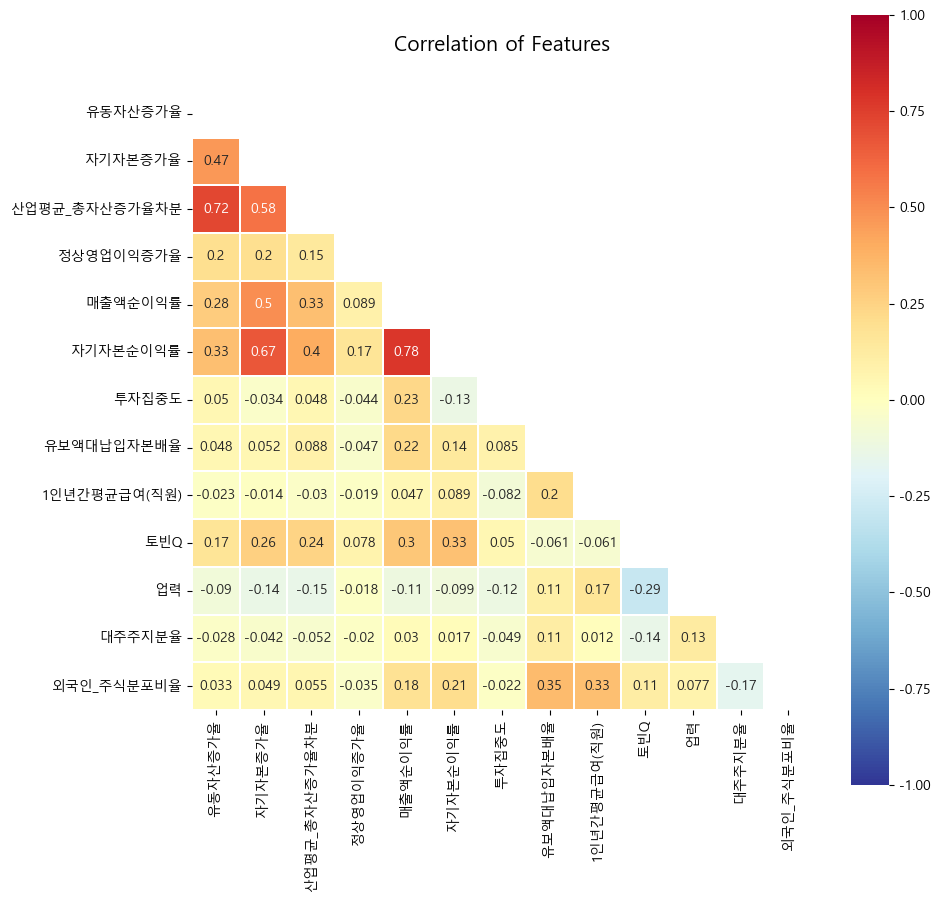

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.hot
col_list = ['유동자산증가율', '자기자본증가율', '산업평균_총자산증가율차분',
            '정상영업이익증가율', '매출액순이익률', '자기자본순이익률','투자집중도',
            '유보액대납입자본배율', '1인년간평균급여(직원)', '토빈Q',
            '업력', '대주주지분율', '외국인_주식분포비율']

corr = x_train[col_list].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10, 10))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr, mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})
